## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [2]:
# Importing the dataset
df = pd.read_csv('House Price India.csv')
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


## Rename Column

In [3]:
df = df.rename(columns={'living area': 'living_area'})

In [4]:
df = df[['living_area','Price']]
df

,living_area,Price
0,3650,2380000
1,2920,1400000
2,2910,1200000
3,3310,838000
4,2710,805000
...,...,...
14615,1556,221700
14616,1680,219200
14617,1070,209000
14618,1030,205000


## Outliers

living_area       Axes(0.125,0.11;0.352273x0.77)
Price          Axes(0.547727,0.11;0.352273x0.77)
dtype: object

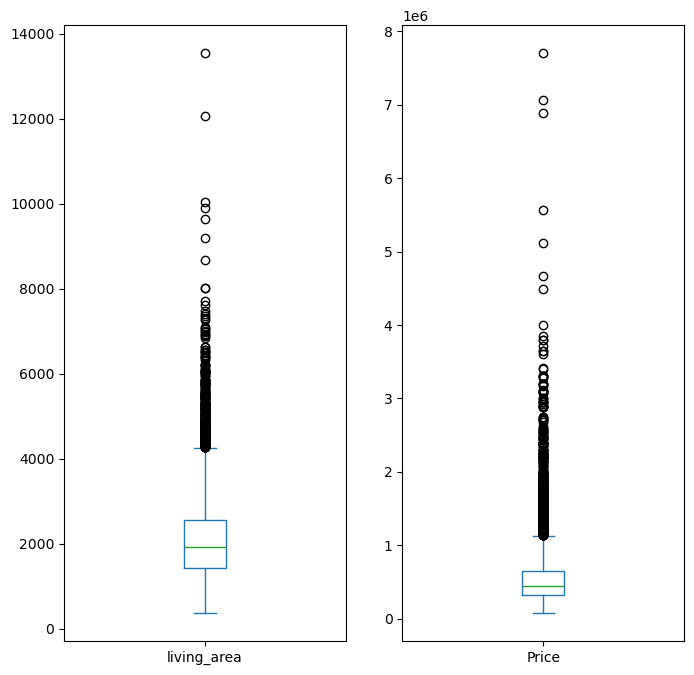

In [5]:
df.plot(kind='box', subplots=True, figsize=(8,8))

In [6]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for kolom in df.columns[0:1]:
    Q1 = df[kolom].quantile(q=.25)
    Q3 = df[kolom].quantile(q=.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - (2 * IQR)
    batas_atas = Q3 + (2 * IQR)
    df = df[~((df[kolom] < batas_bawah) | (df[kolom] > batas_atas))]

df = remove_outliers_iqr(df, 'Price')
df = remove_outliers_iqr(df, 'living_area')


living_area       Axes(0.125,0.11;0.352273x0.77)
Price          Axes(0.547727,0.11;0.352273x0.77)
dtype: object

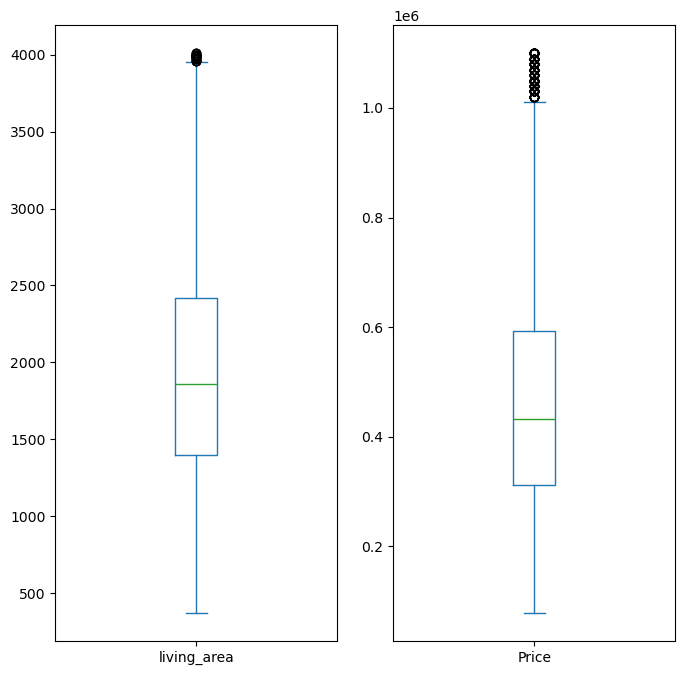

In [7]:
df.plot(kind='box', subplots=True, figsize=(8,8))

In [8]:
missing = df.isnull().sum()
per_mis = 100*(missing/len(df))
data_type = df.dtypes
number_unique = df.nunique()
pd.DataFrame({"Missing" : missing,
                "data_type": data_type,
                "number_unique" : number_unique})

,Missing,data_type,number_unique
living_area,0,int64,644
Price,0,int64,2711


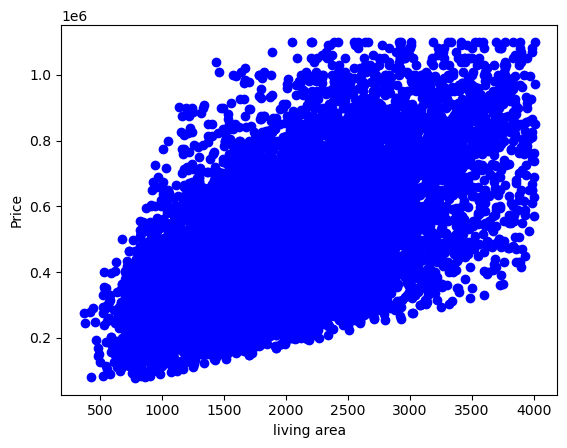

In [9]:
plt.scatter(df.living_area, df.Price,  color='blue')
plt.xlabel("living area")
plt.ylabel("Price")
plt.show()

## Splitting Dataset

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scalling

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Training

In [13]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear', C=100, epsilon=8.5)
svr_poly = SVR(kernel='poly', degree=3, C=100, epsilon=8.5)
svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

SVR(C=100, epsilon=8.5, kernel='poly')

## Visualization

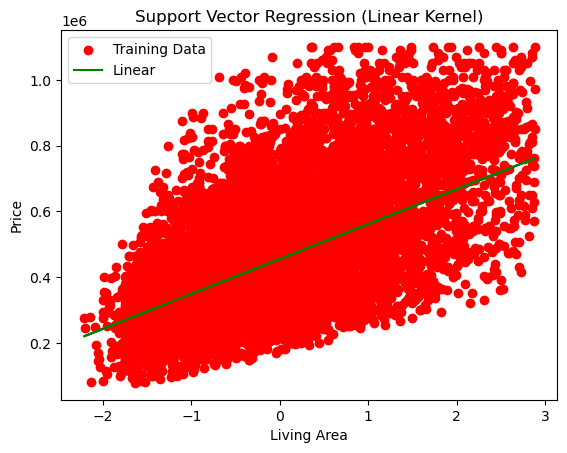

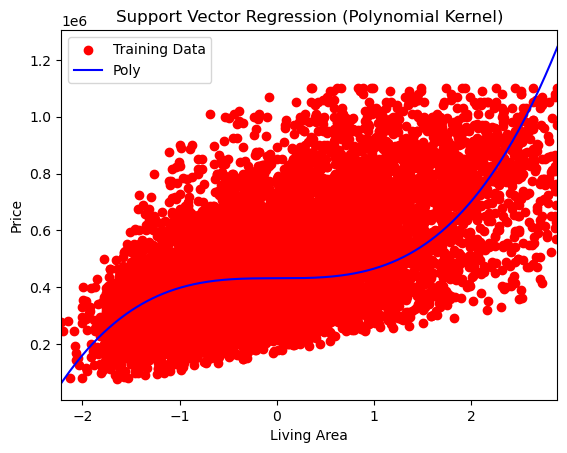

In [14]:
# Visualisasi hasil prediksi model linear
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train, svr_linear.predict(X_train), color='green', label='Linear')
plt.title('Support Vector Regression (Linear Kernel)')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.legend()
plt.show()

sort_axis = np.argsort(X_train.flatten())

# Visualisasi hasil prediksi model polynomial hanya pada rentang data latih
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train [sort_axis], svr_poly.predict(X_train [sort_axis]), color='blue', label='Poly')
plt.title('Support Vector Regression (Polynomial Kernel)')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.legend()

# Menetapkan batas sumbu x pada rentang data latih
plt.xlim(X_train.min(), X_train.max())

plt.show()

In [15]:
pred_linear = svr_linear.predict(X_test)
pred_poly = svr_poly.predict(X_test)

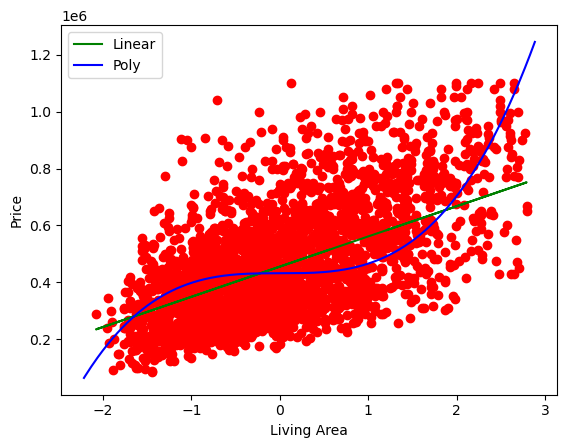

In [16]:
plt.scatter(X_test, y_test,color='red')
plt.plot(X_test, pred_linear, color='green', label='Linear')
plt.plot(X_train [sort_axis], svr_poly.predict(X_train [sort_axis]), color='blue', label='Poly')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.legend()
plt.show()

## Hasil Prediksi SVR linear dan SVR Poly

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 2)
    r2 = round(metrics.r2_score(y_true, y_pred), 2)
    print(f"Evaluation metrics for {model_name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

# Contoh penggunaan:
evaluate_model(y_test, pred_linear, "Linear Regression")
evaluate_model(y_test, pred_poly, "Polynomial Regression")

Evaluation metrics for Linear Regression:
Mean Absolute Error: 129372.3
R-squared: 0.37
Evaluation metrics for Polynomial Regression:
Mean Absolute Error: 137506.21
R-squared: 0.25
